We're now introducing a qlearner that's a bit distracted... it doesn't see the monsters.

It should cap out at a lower mean score, but learn much faster since it doesn't need to see every position.

In [1]:
import matplotlib.pyplot as plt
from treasure_hunt.environment import BaseTreasureHuntEnv as Environment
from treasure_hunt.agent import SimplifierQLearner
from gymnasium.wrappers import TimeLimit

from treasure_hunt.agent.env_reducer import ObliviousReducer

from treasure_hunt.utils import RLRunner

In [ ]:
# Initialize environment and agent
env = TimeLimit(Environment(), 500) # Truncate at 500 steps
agent = SimplifierQLearner(env, ObliviousReducer(env), exploration_decay=.999)

In [3]:
agent.min_exploration_rate=.1

In [4]:
# Setup runner
runner = RLRunner(agent=agent, env=env, total_epochs=1000)

In [5]:
# Train the agent
runner.train_agent()

Epoch 1/100000 - Training complete
Epoch 1/100000 - Mean reward: -500.0
Epoch 2/100000 - Training complete
Epoch 2/100000 - Mean reward: -410.4
Epoch 3/100000 - Training complete
Epoch 3/100000 - Mean reward: -500.0
Epoch 4/100000 - Training complete
Epoch 4/100000 - Mean reward: -500.0
Epoch 5/100000 - Training complete
Epoch 5/100000 - Mean reward: -500.0
Epoch 6/100000 - Training complete
Epoch 6/100000 - Mean reward: -500.0
Epoch 7/100000 - Training complete
Epoch 7/100000 - Mean reward: -410.4
Epoch 8/100000 - Training complete
Epoch 8/100000 - Mean reward: -410.2
Epoch 9/100000 - Training complete
Epoch 9/100000 - Mean reward: -500.0
Epoch 10/100000 - Training complete
Epoch 10/100000 - Mean reward: -321.4
Epoch 11/100000 - Training complete
Epoch 11/100000 - Mean reward: -500.0
Epoch 12/100000 - Training complete
Epoch 12/100000 - Mean reward: -500.0
Epoch 13/100000 - Training complete
Epoch 13/100000 - Mean reward: -411.0
Epoch 14/100000 - Training complete
Epoch 14/100000 - Me

KeyboardInterrupt: 

Mean Reward after training: 107.461


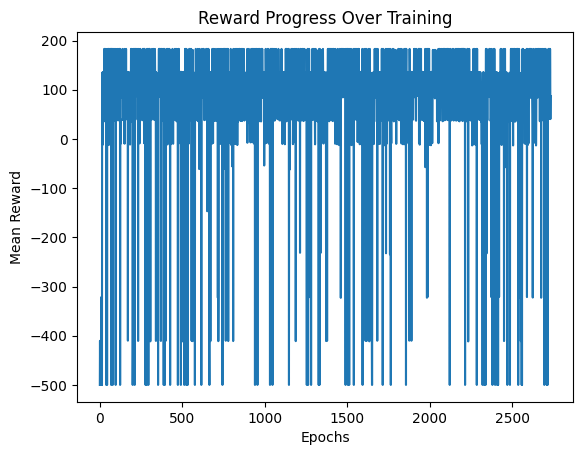

In [11]:
# Evaluate the agent
mean_reward, rewards = agent.evaluate(n_episodes=1000)
print(f"Mean Reward after training: {mean_reward}")

# Plot reward history
plt.plot(runner.reward_history)
plt.xlabel("Epochs")
plt.ylabel("Mean Reward")
plt.title("Reward Progress Over Training")
plt.show()

In [33]:
len([r for r in runner.reward_history if r < 0])

10

In [34]:
import os
import pickle
from datetime import datetime

# Get current timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Create results directory with timestamp subfolder if it doesn't exist
results_dir = os.path.join('results', 'qlearner-static', timestamp)
os.makedirs(results_dir, exist_ok=True)

# Save reward history
with open(os.path.join(results_dir, 'reward_history.pkl'), 'wb') as f:
    pickle.dump(runner.reward_history, f)

# Save mean reward
with open(os.path.join(results_dir, 'mean_reward.txt'), 'w') as f:
    f.write(str(mean_reward))

# Save rewards
with open(os.path.join(results_dir, 'rewards.pkl'), 'wb') as f:
    pickle.dump(rewards, f)

print(f"Results saved to the '{results_dir}' folder.")

Results saved to the 'results/qlearner-static/20241223_183946' folder.
